In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
a_tab = [[300, 1.1614, 184.6, 15.89, 26.3, 0.707],[350,0.995,208.2,20.92,30,0.7]]
w_tab = [[300, 1.003, 855, 613, 5.83, 0.857, 276.1],
        [305, 1.005, 769, 620, 5.2, 0.865, 320.6],
        [310, 1.007, 695, 628, 4.62, 0.873, 361.9],
        [325, 1.013, 528, 645, 3.42, 0.901, 471.2],
        [330, 1.016, 489, 650, 3.15, 0.908, 504]]

In [3]:
def interpol(t , tab):
    prob = []
    a = 0
    b = 1
    for i in range(len(tab)-1):
        if t>tab[i][0]:
            if t<tab[i+1][0]:
                a=i
                b=i+1
    if t>tab[(len(tab)-1)][0]:
        a=len(tab)-2
        b=len(tab)-1
    for i in range(len(tab[0])):
        prob.append(tab[b][i]-(((tab[b][0]-t)/(tab[b][0]-tab[a][0]))*(tab[b][i]-tab[a][i])))
    return prob

In [4]:
def calc_h_w(probs):
    mu = probs[2]*math.pow(10,-6) * probs[1]*math.pow(10,-3)
    gr = (9.81*probs[2]*math.pow(10,-6)*(dTi)*math.pow(l,3))/math.pow(mu,2)
    ra = gr * probs[4]
    nu = 0.13*math.pow(ra,1/3)
    h = nu*probs[3]/(l*1000)
    return h

In [5]:
def calc_h_a(probs):
    v = 0.66667
    re = v*d2/(probs[3]*math.pow(10,-6))
    nu = 0.193*math.pow(re,0.618)*math.pow(probs[5],1/3)
    h = nu*probs[4]/(l*1000)
    return h

# Fixed Parameters 

In [6]:
w = 1.5
l=w
#Volume
vol = 220
#k insulation
k = 0.05
#Temperatures
tw = 55
ta = 25
#Operation hours and days
op_Hours = 24
op_Days = 365
#Operation and fixed costs
Ce = 1.4
Ci = 185/3
no_years = 10
i_r = 0.1

#  For testing 

In [7]:
# var Parameters
delta = 2.5
dTi = 0.129

#Start of Calculations
d1 = math.sqrt((4/math.pi)*(vol/1000)/l)
tmi = tw - 0.5*dTi
w_prob = interpol(tmi+273 , w_tab)
hi = calc_h_w(w_prob)
t1 = 55- dTi
sa_i = math.pi*d1*l
q1 = sa_i*hi*dTi
r1 = d1/2
r2 = d1/2 + delta/100
d2 = r2*2
sa_o = math.pi*d2*l
for x in range(2):
    if x ==0:
        a_prob = interpol(ta+273 , a_tab)
        ho = calc_h_a(a_prob)
        t2 = (((2*math.pi*l*k*t1)/(math.log(r2/r1)))+sa_o*ho*ta)/(((2*math.pi*l*k)/(math.log(r2/r1)))+sa_o*ho)
    else:
        tmo = (ta+t2)/2
        a_prob = interpol(tmo+273, a_tab)
        ho = calc_h_a(a_prob)
        t2 = (((2*math.pi*l*k*t1)/(math.log(r2/r1)))+sa_o*ho*ta)/(((2*math.pi*l*k)/(math.log(r2/r1)))+sa_o*ho)
dTo = t2 - ta
q3 = sa_o*ho*dTo
E = abs(q3-q1)
q_loss = .5*(q1+q3)
q_loss_h = q_loss *3600
co = (q_loss*op_Hours* op_Days)*Ce/1000
p_v = delta*Ci*2.3
R = 0.2
cf = p_v*R
ct = co + cf


In [8]:
p_v

354.58333333333326

# Looping for dTi @delta = 5cm

In [9]:
min_error = 9999999999999
min_dt = 0
for i in range(1000):
   # var Parameters
    delta = 5
    dTi = 0 + 0.001*i
    
    #calculations
    tmi = tw - 0.5*dTi
    w_prob = interpol(tmi+273 , w_tab)
    hi = calc_h_w(w_prob)
    t1 = 55- dTi
    sa_i = math.pi*d1*l
    q1 = sa_i*hi*dTi
    r1 = d1/2
    r2 = d1/2 + delta/100
    d2 = r2*2
    t2 = (((2*math.pi*l*k*t1)/(math.log(r2/r1)))+sa_o*ho*ta)/(((2*math.pi*l*k)/(math.log(r2/r1)))+sa_o*ho)
    tmo = (ta+t2)/2
    a_prob = interpol(tmo+273 , a_tab)
    ho = calc_h_a(a_prob)
    d2 = r2*2
    sa_o = math.pi*d2*l
    for x in range(2):
        if x ==0:
            a_prob = interpol(ta+273 , a_tab)
            ho = calc_h_a(a_prob)
            t2 = (((2*math.pi*l*k*t1)/(math.log(r2/r1)))+sa_o*ho*ta)/(((2*math.pi*l*k)/(math.log(r2/r1)))+sa_o*ho)
        else:
            tmo = (ta+t2)/2
            a_prob = interpol(tmo+273, a_tab)
            ho = calc_h_a(a_prob)
            t2 = (((2*math.pi*l*k*t1)/(math.log(r2/r1)))+sa_o*ho*ta)/(((2*math.pi*l*k)/(math.log(r2/r1)))+sa_o*ho)
    dTo = t2 - ta
    q3 = sa_o*ho*dTo
    E = abs(q3-q1)
    q_loss = .5*(q1+q3)
    if E < min_error:
        min_error = E
        min_dt = dTi

# The min error &  dTi

In [10]:
print("The min error =" , min_error)
print("At dTi =" , min_dt)

The min error = 0.05340072964488485
At dTi = 0.124


# Parameters @ dTi_min

In [11]:
#Parameters
#Width
delta = 5
dTi = min_dt

#Start of Calculations
d1 = math.sqrt((4/math.pi)*(vol/1000)/l)
tmi = tw - 0.5*dTi
w_prob = interpol(tmi+273 , w_tab)
hi = calc_h_w(w_prob)
t1 = 55- dTi
sa_i = math.pi*d1*l
q1 = sa_i*hi*dTi
r1 = d1/2
r2 = d1/2 + delta/100
d2 = r2*2
sa_o = math.pi*d2*l
for x in range(2):
    if x ==0:
        a_prob = interpol(ta+273 , a_tab)
        ho = calc_h_a(a_prob)
        t2 = (((2*math.pi*l*k*t1)/(math.log(r2/r1)))+sa_o*ho*ta)/(((2*math.pi*l*k)/(math.log(r2/r1)))+sa_o*ho)
    else:
        tmo = (ta+t2)/2
        a_prob = interpol(tmo+273, a_tab)
        ho = calc_h_a(a_prob)
        t2 = (((2*math.pi*l*k*t1)/(math.log(r2/r1)))+sa_o*ho*ta)/(((2*math.pi*l*k)/(math.log(r2/r1)))+sa_o*ho)
dTo = t2 - ta
q3 = sa_o*ho*dTo
E = abs(q3-q1)
q_loss = .5*(q1+q3)
q_loss_h = q_loss *3600
co = (q_loss*op_Hours* op_Days)*Ce/1000
p_v = 0.2*delta*50*sa_o
R = (i_r*math.pow((1+i_r),no_years))/(math.pow((1+i_r),no_years)-1)
cf = p_v*R
ct = co + cf


# Choose max delta

In [12]:
max_delta = 20
#printing max delta
print("max delta =" , max_delta)

max delta = 20



# Looping on the range of delta and calculate cost

In [13]:
delta_step = 0.25

In [14]:
dTi = min_dt
delta = 2.5
min_cost =9999999999999
#Start of Calculations
d1 = math.sqrt((4/math.pi)*(vol/1000)/l)
tmi = tw - 0.5*dTi
w_prob = interpol(tmi+273 , w_tab)
hi = calc_h_w(w_prob)
t1 = 55- dTi
sa_i = math.pi*d1*l
q1 = sa_i*hi*dTi
r1 = d1/2
r2 = d1/2 + delta/100
d2 = r2*2
sa_o = math.pi*d2*l
for x in range(2):
    if x ==0:
        a_prob = interpol(ta+273 , a_tab)
        ho = calc_h_a(a_prob)
        t2 = (((2*math.pi*l*k*t1)/(math.log(r2/r1)))+sa_o*ho*ta)/(((2*math.pi*l*k)/(math.log(r2/r1)))+sa_o*ho)
    else:
        tmo = (ta+t2)/2
        a_prob = interpol(tmo+273, a_tab)
        ho = calc_h_a(a_prob)
        t2 = (((2*math.pi*l*k*t1)/(math.log(r2/r1)))+sa_o*ho*ta)/(((2*math.pi*l*k)/(math.log(r2/r1)))+sa_o*ho)
dTo = t2 - ta
q3 = sa_o*ho*dTo
E = abs(q3-q1)
q_loss = .5*(q1+q3)

#Calculate cost
q_loss_h = q_loss *3600
co = (q_loss*op_Hours* op_Days)*Ce/1000
p_v = delta*Ci*3.4
R = (i_r*math.pow((1+i_r),no_years))/(math.pow((1+i_r),no_years)-1)
R = 0.2
cf = p_v*R
ct = co + cf
if ct < min_cost:
    min_cost = ct
    min_cf = cf
    min_co = co
    min_delta = delta
    min_q_loss = q_loss

In [15]:
p_v

524.1666666666666

In [16]:
#Volume
dTi = min_dt
q_loss_l = []
co_l = []
cf_l = []
ct_l = []
min_cost = 9999999999999999999
ite = (max_delta/delta_step)
#varParameters
for i in range(int(ite)):
    delta = delta_step + delta_step*i

    #Start of Calculations
    d1 = math.sqrt((4/math.pi)*(vol/1000)/l)
    tmi = tw - 0.5*dTi
    w_prob = interpol(tmi+273 , w_tab)
    hi = calc_h_w(w_prob)
    t1 = 55- dTi
    sa_i = math.pi*d1*l
    q1 = sa_i*hi*dTi
    r1 = d1/2
    r2 = d1/2 + delta/100
    d2 = r2*2
    sa_o = math.pi*d2*l
    for x in range(2):
        if x ==0:
            a_prob = interpol(ta+273 , a_tab)
            ho = calc_h_a(a_prob)
            t2 = (((2*math.pi*l*k*t1)/(math.log(r2/r1)))+sa_o*ho*ta)/(((2*math.pi*l*k)/(math.log(r2/r1)))+sa_o*ho)
        else:
            tmo = (ta+t2)/2
            a_prob = interpol(tmo+273, a_tab)
            ho = calc_h_a(a_prob)
            t2 = (((2*math.pi*l*k*t1)/(math.log(r2/r1)))+sa_o*ho*ta)/(((2*math.pi*l*k)/(math.log(r2/r1)))+sa_o*ho)
    dTo = t2 - ta
    q3 = sa_o*ho*dTo
    E = abs(q3-q1)
    q_loss = .5*(q1+q3)
    
    #Calculate cost
    q_loss_h = q_loss *3600
    co = (q_loss*op_Hours* op_Days)*Ce/1000
    p_v = delta*Ci*2.3
    R = (i_r*math.pow((1+i_r),no_years))/(math.pow((1+i_r),no_years)-1)
    R = 0.2
    cf = p_v*R
    ct = co + cf
    if ct < min_cost:
        min_cost = ct
        min_cf = cf
        min_co = co
        min_delta = delta
        min_q_loss = q_loss
    co_l.append(co)
    cf_l.append(cf)
    ct_l.append(ct)
    q_loss_l.append(q_loss)


In [17]:
p_v

2836.666666666666

In [18]:
#Print min cost & min delta
print("min cost @ delta=" , min_delta , "cm")
print("min total cost =" , round(min_cost,2) , "EGP")
print("min fixed cost =" , round(min_cf,2) , "EGP")
print("min operating cost =" ,round(min_co,2), "EGP")
print("Q_loss =" , round(min_q_loss,2) , "W")


min cost @ delta= 4.0 cm
min total cost = 651.65 EGP
min fixed cost = 113.47 EGP
min operating cost = 538.19 EGP
Q_loss = 43.88 W


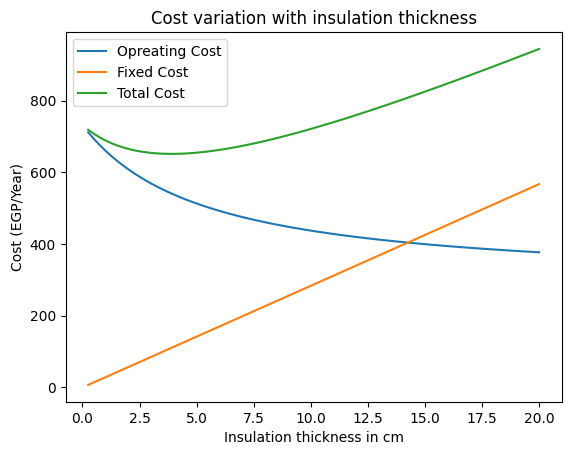

In [28]:
plt.plot(np.arange(delta_step,max_delta+delta_step,delta_step), co_l)
plt.plot(np.arange(delta_step,max_delta+delta_step,delta_step), cf_l)
plt.plot(np.arange(delta_step,max_delta+delta_step,delta_step), ct_l)
plt.xlabel("Insulation thickness in cm")
plt.ylabel("Cost (EGP/Year)")
plt.legend(["Opreating Cost", "Fixed Cost", "Total Cost"])
plt.title("Cost variation with insulation thickness")
plt.show()


# Put Data in dataframe

In [20]:
cost_v = pd.DataFrame(data={
    "Thickness of insulation (cm)":np.arange(delta_step,max_delta+delta_step,delta_step),
    "Energy loss rate (watt)": q_loss_l,
    "Operation Cost (EGP)": co_l,
    "Fixed Cost (EGP)": cf_l,
    "Total Cost (EGP)": ct_l,
})

# Cost variation with thickness of isulation

In [21]:
cost_v.loc[cost_v['Thickness of insulation (cm)'].isin(np.arange(2.5,5.25,0.5))]

,Thickness of insulation (cm),Energy loss rate (watt),Operation Cost (EGP),Fixed Cost (EGP),Total Cost (EGP)
9,2.5,47.931695,587.834306,70.916667,658.750973
11,3.0,46.419711,569.291335,85.100000,654.391335
13,3.5,45.079317,552.852746,99.283333,652.136080
15,4.0,43.883432,538.186412,113.466667,651.653079
17,4.5,42.810301,525.025533,127.650000,652.675533
19,5.0,41.842264,513.153528,141.833333,654.986862


In [22]:
185/3

61.666666666666664